<a href="https://colab.research.google.com/github/vindowsclient/StockTrends/blob/master/WK2_vinStockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the dependencies...

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web


# scientific models...
!pip install -U scikit-learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

# get the metrics as well...
from sklearn import metrics

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [2]:
# Prepare to get the data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd '/content/drive/My Drive/samplemarketdata_forML'

Mounted at /content/drive
/content/drive/My Drive/samplemarketdata_forML


In [0]:

# fetch the data...
scrip = 'AAPL'
scripsrc = 'yahoo'

from pandas import Series, DataFrame

start = datetime.datetime(2019, 1, 1)
#end = datetime.datetime(2019, 9, 8)

#df = web.DataReader(scrip, scripsrc, start, end)
#df.tail()

df = web.get_data_yahoo(scrip, start)
df.to_csv('output/'+scrip+'.csv', index=False)

In [4]:
# get the stats of the data
df.shape

(176, 6)

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,156.049484
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,140.505798
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,146.503891
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,146.177811
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.964386


In [6]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,176.000000,176.000000,176.000000,176.000000,1.760000e+02,176.000000
mean,191.257330,187.765795,189.320568,189.605341,2.889394e+07,188.549522
std,18.569755,18.353156,18.456454,18.333915,1.145611e+07,18.707644
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.947498,175.247501,174.945000,2.111072e+07,173.614227
50%,196.644997,193.144997,194.824997,194.949997,2.628020e+07,193.735008
75%,205.434998,202.344997,203.507504,203.900002,3.251772e+07,202.746956
max,226.419998,222.860001,224.800003,223.589996,9.131220e+07,223.589996


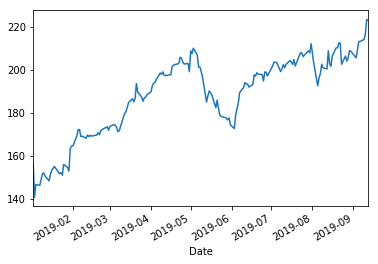

In [7]:
df['Adj Close'].plot()

In [10]:
#df.set_index('Date', inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,156.049484
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,140.505798
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,146.503891
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,146.177811
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.964386


In [18]:
window_size=32
num_samples=len(df)-window_size

indices=np.arange(num_samples).astype(np.int)[:, None]+np.arange(window_size+1).astype(np.int)

# 2 dimensional data MATRIX
# Split into X & Y for marking...
data = df['Adj Close'].values[indices] 
x = data[:,:-1] 
y = data[:,-1] 
x 
#y

array([[156.04948425, 140.50579834, 146.50389099, ..., 168.88546753,
        169.5007782 , 169.12365723],
       [140.50579834, 146.50389099, 146.17781067, ..., 169.5007782 ,
        169.12365723, 169.62976074],
       [146.50389099, 146.17781067, 148.96438599, ..., 169.12365723,
        169.62976074, 170.72140503],
       ...,
       [206.23641968, 206.95368958, 208.88633728, ..., 213.27999878,
        213.25999451, 214.16999817],
       [206.95368958, 208.88633728, 207.98974609, ..., 213.25999451,
        214.16999817, 216.69999695],
       [208.88633728, 207.98974609, 212.23362732, ..., 214.16999817,
        216.69999695, 223.58999634]])

In [22]:
# confidence level to split things is 80%...

fraction=0.8
ind_split=int(fraction*num_samples)

x_train = x[:ind_split]
y_train = y[:ind_split]
x_test = x[ind_split:]
y_test = y[ind_split:]

y_train.shape


(115,)

Dig deeper

In [0]:
#Help Functions (still need to clean up...)
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [29]:
y_pred_lag=np.roll(y_test,1)

get_performance(y_pred_lag)

#Mean Absolute Error: 3.8656
#Mean Squared Error: 31.8917
#Root Mean Squared Error: 5.6473

Mean Absolute Error: 3.8656
Mean Squared Error: 31.8917
Root Mean Squared Error: 5.6473


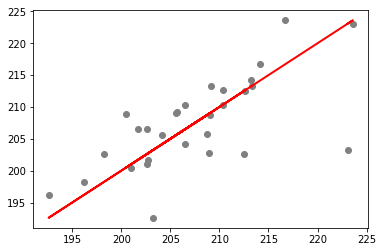

In [30]:
get_plot(y_pred_lag)